In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display
%matplotlib inline

ImportError: cannot import name __check_build

In [184]:
hop_length = 64
n_fft = 256
f_low_pass = 5000
n_mfcc=10
f_sampling = 8000

In [279]:
a = np.array([1,2])
np.concatenate([a,a])

array([1, 2, 1, 2])

In [460]:
N_step_max = int(3)
step_sizes_sigma= np.empty([N_step_max**2, 2], dtype=int)

cnt=0
for j in xrange(N_step_max):
    for k in xrange(N_step_max):        
            step_sizes_sigma[cnt,0] = j+1        
            step_sizes_sigma[cnt,1] = k+1
            cnt+=1

        
    
    
# for j in range(N_step_max):
#     step_sizes_sigma[j,0] = int(0)
#     step_sizes_sigma[j,1] = int(j+1)
#     step_sizes_sigma[j+N_step_max,0] = int(j+1)
#     step_sizes_sigma[j+N_step_max,1] = int(0)
#     step_sizes_sigma[j+2*N_step_max,0] = int(j+1)
#     step_sizes_sigma[j+2*N_step_max,1] = int(j+1)
    
    

step_sizes_sigma

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [332]:
def file_segmentation(fname, t_start, t_dur, f_sampling):
    # Separates file 'fname' into 2 parts:  (1) within [t_start, t_end] + (2) the rest
                                                
    
    signal, f_sampling  = librosa.load(fname,sr = f_sampling)
    ind_start = int(t_start*f_sampling)
    ind_end   = ind_start + int(t_dur*f_sampling)
    fragment = signal[ind_start: ind_end]
    the_rest = np.concatenate([signal[:ind_start], signal[ind_end:] ])
    librosa.output.write_wav(fname.split('.')[0] + '_code_word.wav', fragment, f_sampling)
    
    
    return fragment, the_rest, signal

#file_segmentation('4136852_.wav', 10.2, 0.6, f_sampling)
#file_segmentation('4043308_.wav', 18.9, 0.6, f_sampling)
#file_segmentation('4026880_.wav', 23.1, 0.63, f_sampling)
#file_segmentation('4037181_.wav', 32.1, 0.63, f_sampling)



In [316]:
file_keyword_dict = dict({
    '4136852_.wav': (10.2, 0.6),
    '4043308_.wav': (18.9, 0.6),
    '4026880_.wav': (23.1, 0.63),
    '4037181_.wav': (32.1, 0.63)
})

In [333]:
code_words = []
the_rests = []
signals = []
for fname in file_keyword_dict.iterkeys():
    print fname
    tstart, t_dur = file_keyword_dict[fname] 
    code_word, the_rest, signal = file_segmentation(fname, tstart, t_dur, f_sampling)
    code_words.append(code_word)
    the_rests.append(the_rest)
    signals.append(signal)

4043308_.wav
4037181_.wav
4136852_.wav
4026880_.wav


In [461]:
codewords_2_therests = np.empty([len(code_words), len(the_rests)]) 
codewords_2_codewords =  np.empty([len(code_words), len(the_rests)])
codewords_2_signals = np.empty([len(code_words), len(signals)])
for j in range(len(code_words)): 
    code_word = code_words[j]
    code_word_mfcc = librosa.feature.mfcc(y=code_word, sr=f_sampling, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)
    
    for k in range(len(the_rests)):
        the_rest =  the_rests[k]
        the_rest_mfcc  = librosa.feature.mfcc(y=the_rest, sr=f_sampling, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)
        
        (D, path) = librosa.core.dtw(the_rest_mfcc, code_word_mfcc, subseq=True, step_sizes_sigma=step_sizes_sigma)
        codewords_2_therests[j,k] = np.min(D[-1,:])
        
    for k in range(len(the_rests)):
        code_word1 = code_words[k]
        code_word1_mfcc = librosa.feature.mfcc(y=code_word1, sr=f_sampling, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)
        
        (D, path) = librosa.core.dtw(code_word1_mfcc, code_word_mfcc, subseq=True, step_sizes_sigma=step_sizes_sigma)
        codewords_2_codewords[j,k] = np.min(D[-1,:])
        
    for k in range(len(signals)):
        signal = signals[k]
        signal_mfcc = librosa.feature.mfcc(y=signal, sr=f_sampling, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)
        
        (D, path) = librosa.core.dtw(signal_mfcc,code_word_mfcc, subseq=True, step_sizes_sigma=step_sizes_sigma)
        codewords_2_signals[j,k] = np.min(D[-1,:])

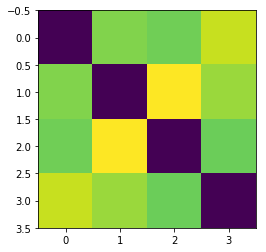

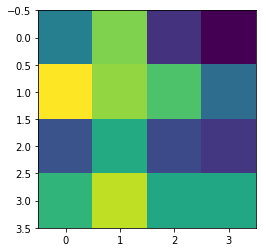

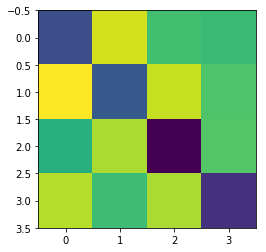

In [453]:
plt.imshow(codewords_2_codewords)
plt.figure()
plt.imshow(codewords_2_therests)
plt.figure()
plt.imshow(codewords_2_signals)

In [462]:
codewords_2_codewords

array([[    0.        ,  1354.78278286,  1884.83307412,  2050.22682046],
       [ 1354.78278286,     0.        ,  1904.51040827,  1394.9536246 ],
       [ 1638.06986321,  1904.51040827,     0.        ,  1667.70736549],
       [ 2050.22682046,  1671.46433208,  1667.70736549,     0.        ]])

In [463]:
codewords_2_therests

array([[ 1898.40419032,  2053.42283833,  2140.32146396,  2099.49352367],
       [ 2475.13503763,  2249.78347492,  2474.9458009 ,  2209.80841212],
       [ 1869.89379785,  1888.37294305,  1864.72857701,  1866.66006127],
       [ 2354.85028669,  2302.32462702,  2174.20930353,  2177.36686041]])

In [464]:
codewords_2_signals

array([[ 1043.51708931,  1620.36573559,  1800.84921045,  2097.94327034],
       [ 2337.78326536,  1082.14507206,  2403.91534247,  1875.19959104],
       [ 1800.38215141,  1638.78794695,   445.79876345,  1547.02781928],
       [ 2354.85028669,  1580.79689876,  2174.20930353,   730.48280493]])

In [465]:
codewords_2_signals = symmetric_min(codewords_2_signals)
codewords_2_signals_off_diag = np.concatenate([codewords_2_signals[np.triu_indices(codewords_2_signals.shape[0], k=1)],
                                              codewords_2_signals[np.tril_indices(codewords_2_signals.shape[0], k=-1)]])

In [466]:
codewords_2_therests = symmetric_min(codewords_2_therests)
codewords_2_therests_off_diag = np.concatenate([codewords_2_therests[np.triu_indices(codewords_2_therests.shape[0], k=1)],
                                              codewords_2_therests[np.tril_indices(codewords_2_therests.shape[0], k=-1)]])

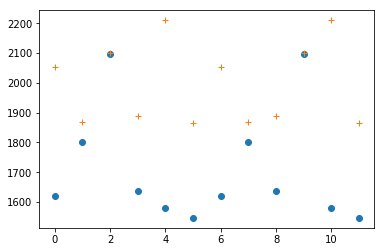

In [467]:
plt.plot(codewords_2_signals_off_diag.flatten(), 'o')

plt.plot(codewords_2_therests_off_diag.flatten(), '+')

In [387]:
np.triu_indices(codewords_2_therests.shape[0], k=1)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

In [388]:
np.mean(codewords_2_therests[np.triu_indices(codewords_2_therests.shape[0], k=1)])

2140.7753500429967

In [389]:
np.mean(codewords_2_signals[np.triu_indices(codewords_2_signals.shape[0], k=1)])

1890.8834948620377

In [375]:
np.mean(codewords_2_signals, axis=1)

array([ 1640.66882642,  1924.76081773,  1357.99917027,  1710.08482348])

In [384]:
np.mean(codewords_2_codewords[np.triu_indices(codewords_2_signals.shape[0], k=1)])

1709.5023459652182

## Alignment of fragment with it's original file

In [185]:
signal, f_sampling  = librosa.load('4136852_.wav',sr = 8000)

In [186]:
t_start = 10.2; ind_start = int(t_start*f_sampling)
t_end = 10.8;   ind_end   = int(t_end  *f_sampling)
fragment = signal[ind_start: ind_end]

In [187]:
librosa.output.write_wav('4136852_code_word.wav', fragment, 8000)

In [188]:
signal_mfcc = librosa.feature.mfcc(y=signal, sr=8000, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)

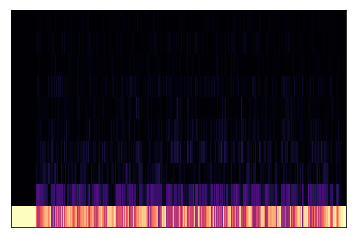

In [189]:
display.specshow(np.abs(signal_mfcc)
                             )

In [190]:
fragment_mfcc = librosa.feature.mfcc(y=fragment, sr=8000, n_mfcc=n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)


In [266]:
(D, path) = librosa.core.dtw(signal_mfcc, fragment_mfcc, subseq=True)

1265.69010944


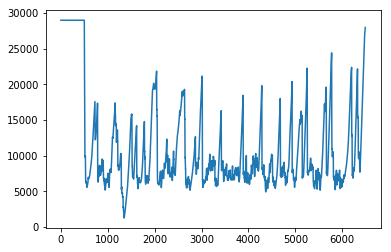

In [269]:
min_dist = np.min(D[-1,:])
#temp.shape
plt.plot(D[-1,:])
print min_dist

In [192]:
for j in xrange(path.shape[0]):
    print path[j,:]

[1350   75]
[1349   74]
[1348   73]
[1347   72]
[1346   71]
[1345   70]
[1344   69]
[1343   68]
[1342   67]
[1341   66]
[1340   65]
[1339   64]
[1338   63]
[1337   62]
[1336   61]
[1335   60]
[1334   59]
[1333   58]
[1332   57]
[1331   56]
[1330   55]
[1329   54]
[1328   53]
[1327   52]
[1326   51]
[1325   50]
[1324   49]
[1323   48]
[1322   47]
[1321   46]
[1320   45]
[1319   44]
[1318   43]
[1317   42]
[1316   41]
[1315   40]
[1314   39]
[1313   38]
[1312   37]
[1311   36]
[1310   35]
[1309   34]
[1308   33]
[1307   32]
[1306   31]
[1305   30]
[1304   29]
[1303   28]
[1302   27]
[1301   26]
[1300   25]
[1299   24]
[1298   23]
[1297   22]
[1296   21]
[1295   20]
[1294   19]
[1293   18]
[1292   17]
[1291   16]
[1290   15]
[1289   14]
[1288   13]
[1287   12]
[1286   11]
[1285   10]
[1284    9]
[1283    8]
[1282    7]
[1281    6]
[1280    5]
[1279    4]
[1278    3]
[1277    2]
[1276    1]
[1275    0]


## Alignment of code word with another file

In [193]:
test_signal, f_sampling  = librosa.load('4043308_.wav',sr = 8000)
test_mfcc = librosa.feature.mfcc(y=test_signal, n_mfcc= n_mfcc,  sr=8000, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)

In [194]:
test_signal2, f_sampling  = librosa.load('4026880_.wav',sr = 8000)
test2_mfcc = librosa.feature.mfcc(y=test_signal2, sr=8000, n_mfcc= n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)

In [195]:
test_signal3, f_sampling  = librosa.load('4037181_.wav',sr = 8000)
test3_mfcc = librosa.feature.mfcc(y=test_signal3, sr=8000, n_mfcc= n_mfcc,  hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)

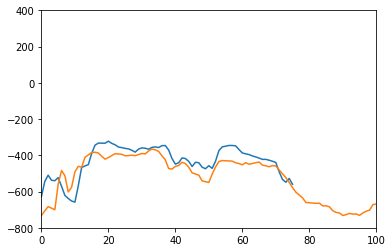

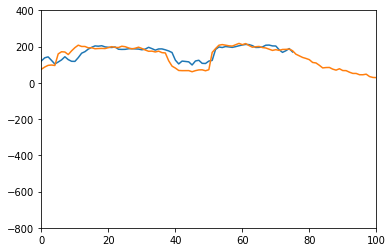

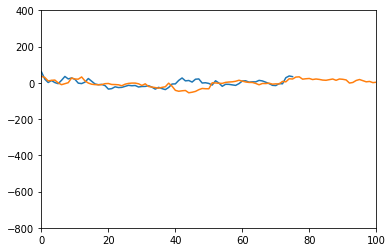

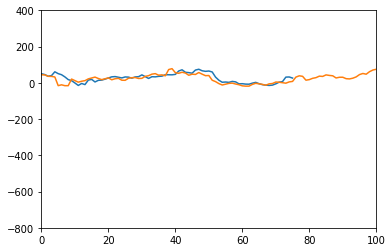

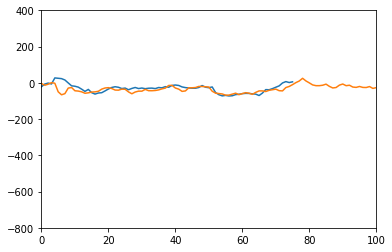

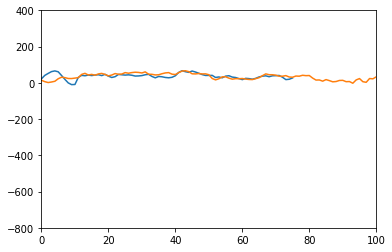

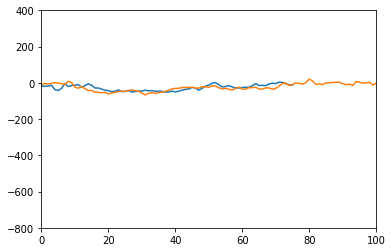

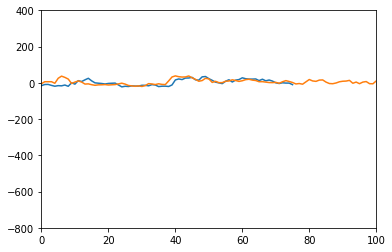

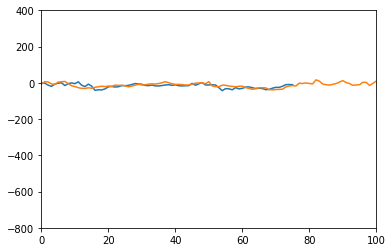

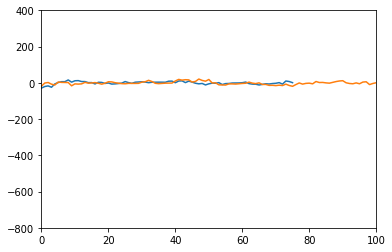

In [209]:
ind_start = int(18.98*8000)#int(18.5*8000)
ind_end   = int(20.7*8000)#int(19.7*8000)
test_fragment = test_signal[ind_start:ind_end]
test_fragment_mfcc = librosa.feature.mfcc(y=test_fragment, sr=8000, n_mfcc= n_mfcc, hop_length = hop_length, n_fft=n_fft, fmax = f_low_pass)
librosa.output.write_wav('4043308_code_word.wav', test_fragment, 8000)

for ml_ind in range(n_mfcc):    
    #for j in r:
    vec1 = fragment_mfcc[ml_ind,:]
    vec2 = test_fragment_mfcc[ml_ind,:]
    plt.figure()
    plt.plot(vec1)
    plt.plot(vec2)
    plt.ylim([-800,400])
    plt.xlim([0,100])

array([[1, 1]])

[  75 6609]
[  74 6608]
[  73 6607]
[  72 6606]
[  71 6605]
[  70 6604]
[  69 6603]
[  68 6602]
[  67 6601]
[  66 6600]
[  65 6599]
[  64 6598]
[  63 6597]
[  62 6596]
[  61 6595]
[  60 6594]
[  59 6593]
[  58 6592]
[  57 6591]
[  56 6590]
[  55 6589]
[  54 6588]
[  53 6587]
[  52 6586]
[  51 6585]
[  50 6584]
[  49 6583]
[  48 6582]
[  47 6581]
[  46 6580]
[  45 6579]
[  44 6578]
[  43 6577]
[  42 6576]
[  41 6575]
[  40 6574]
[  39 6573]
[  38 6572]
[  37 6571]
[  36 6570]
[  35 6569]
[  34 6568]
[  33 6567]
[  32 6566]
[  31 6565]
[  30 6564]
[  29 6563]
[  28 6562]
[  27 6561]
[  26 6560]
[  25 6559]
[  24 6558]
[  23 6557]
[  22 6556]
[  21 6555]
[  20 6554]
[  19 6553]
[  18 6552]
[  17 6551]
[  16 6550]
[  15 6549]
[  14 6548]
[  13 6547]
[  12 6546]
[  11 6545]
[  10 6544]
[   9 6543]
[   8 6542]
[   7 6541]
[   6 6540]
[   5 6539]
[   4 6538]
[   3 6537]
[   2 6536]
[   1 6535]
[   0 6534]


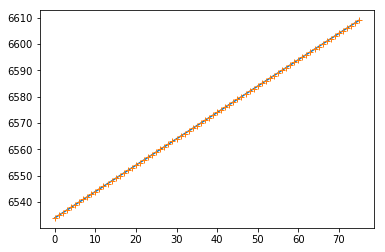

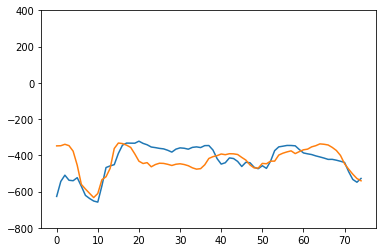

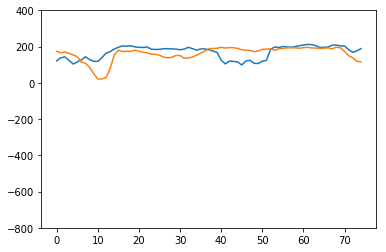

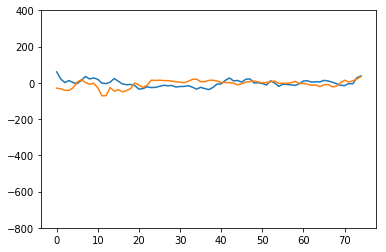

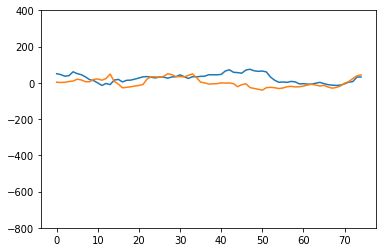

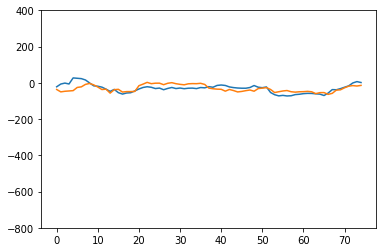

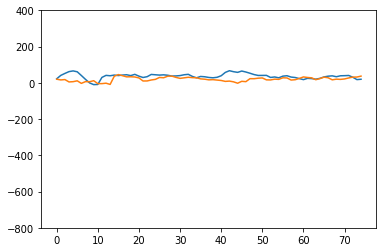

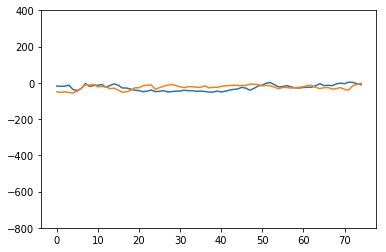

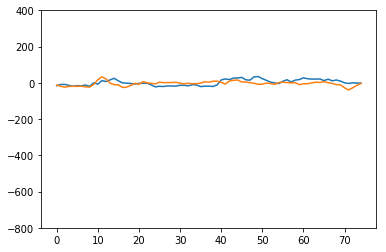

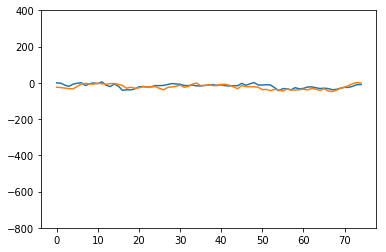

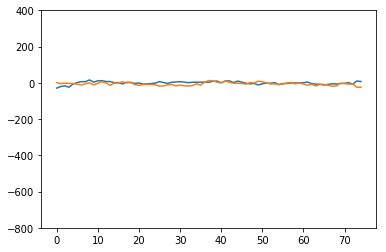

In [231]:
(temp, path) = librosa.core.dtw(fragment_mfcc, test3_mfcc, subseq=True, step_sizes_sigma = step_sizes_sigma)
for j in xrange(path.shape[0]):
    print path[j,:]

plt.plot(path[:,0], path[:,1])
plt.plot(path[:,0], path[:,1],'+')

for ml_ind in range(n_mfcc):    
    #for j in r:
    vec1 = fragment_mfcc[ml_ind, path[-1,0]:path[0,0] ]
    vec2 = test3_mfcc[ml_ind, path[-1,1]:path[0,1] ]
    plt.figure()
    plt.plot(vec1)
    plt.plot(vec2)
    plt.ylim([-800,400])
    
    
plt.figure()



In [230]:
np.mean(path[:,1])*hop_length/8000

19.268000000000001

In [207]:
path[-1,0]

0

In [205]:
float(2441*128)/8000

39.056

## Alignment of 2 small fragments with codeword 

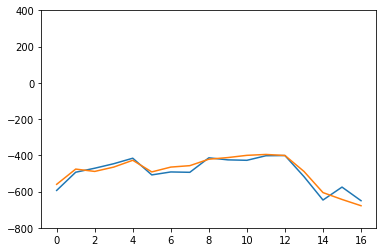

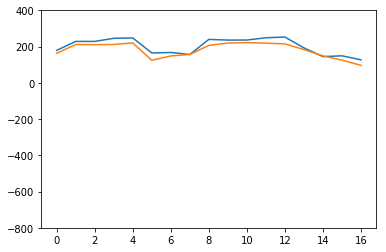

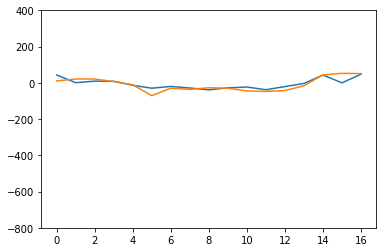

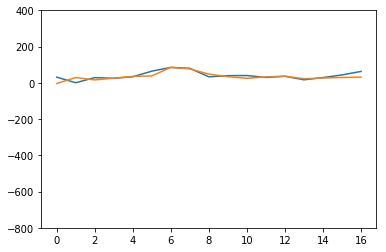

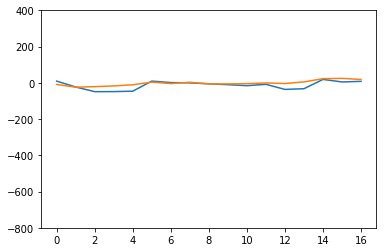

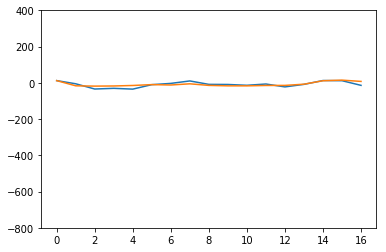

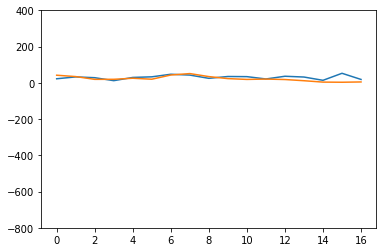

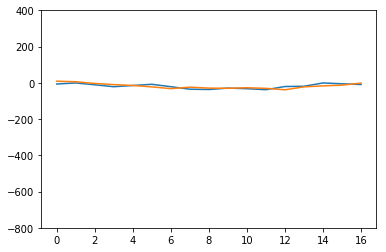

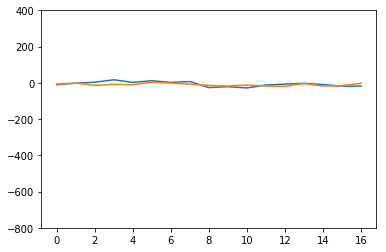

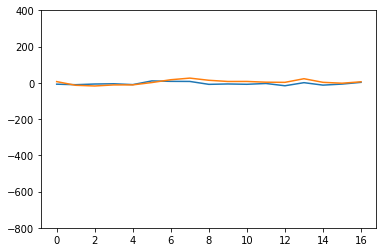

In [117]:
#r = range(16); r.reverse()
path = path
for ml_ind in range(n_mfcc):    
    #for j in r:
    vec1 = fragment_mfcc[ml_ind, path[:,0] ]
    vec2 = test_mfcc[ml_ind, path[:,1] ]
    plt.figure()
    plt.plot(vec1)
    plt.plot(vec2)
    plt.ylim([-800,400])

    

In [118]:
test_mfcc.shape[1]*128/8000

131

In [119]:
test_mfcc.shape

(10, 8244)

IndexError: index 10 is out of bounds for axis 0 with size 10

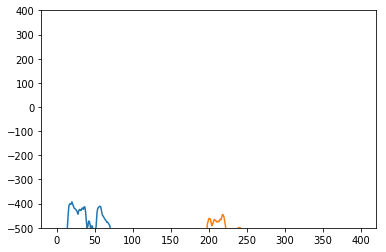

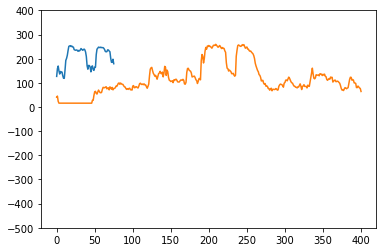

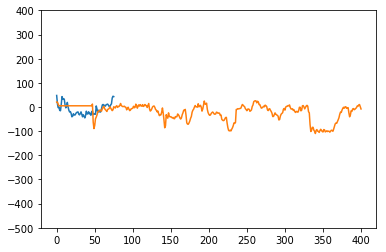

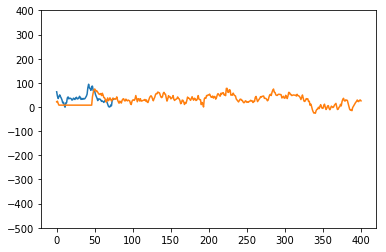

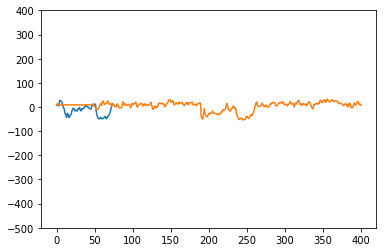

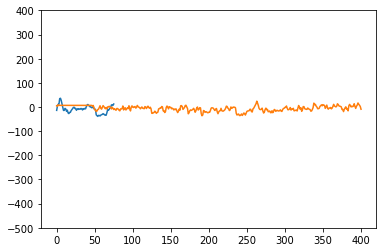

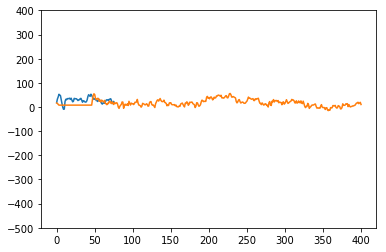

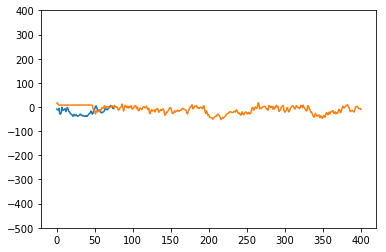

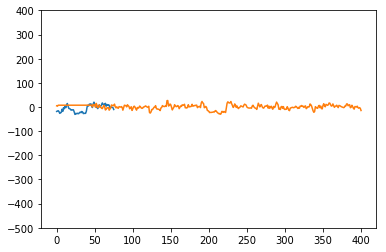

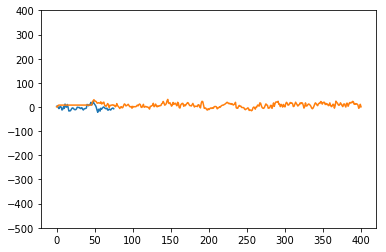

In [120]:

for j in xrange(20):
    plt.figure()
    plt.plot(fragment_mfcc[j,:])
    plt.plot(test_fragment_mfcc[j,:])
    #plt.plot(test_fragment_1_mfcc[j,:])
    
    plt.ylim([-500,400])